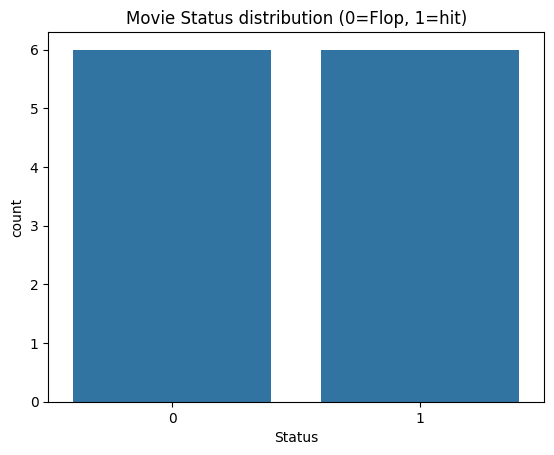

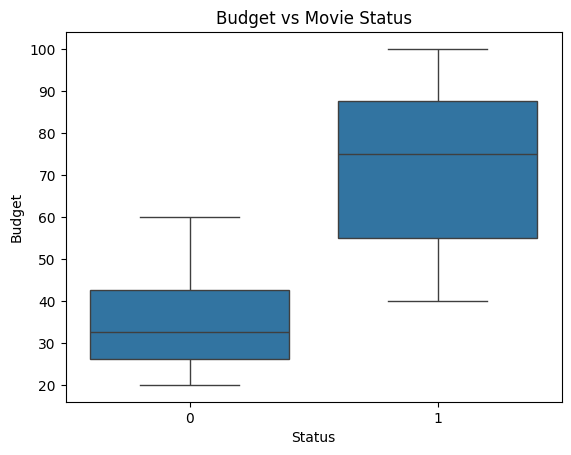

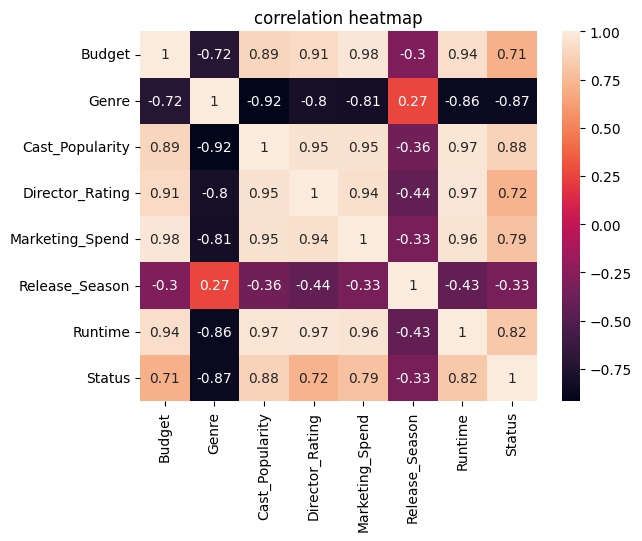


logistic regression Accuacy: 1.0

decision tree Accuacy: 1.0

random forest Accuacy: 1.0

SVA Accuacy: 0.5

Gradient Boosting Accuacy: 1.0


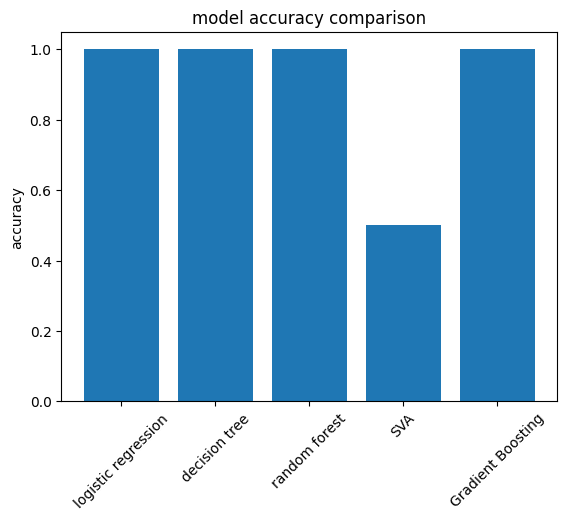

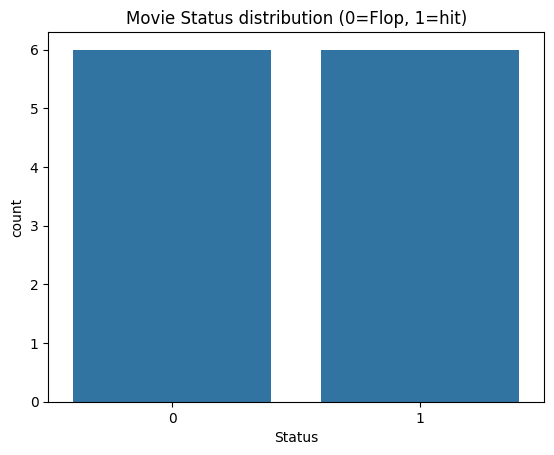

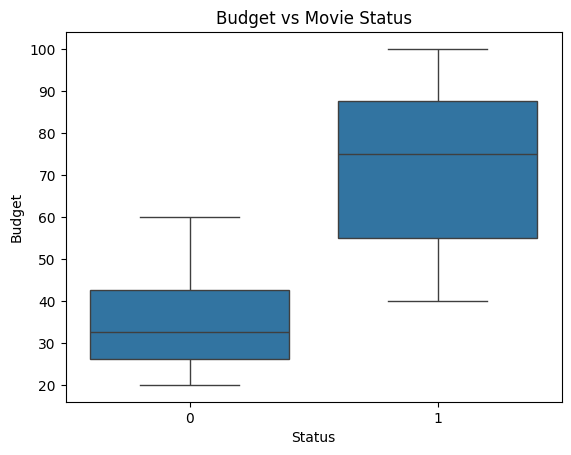

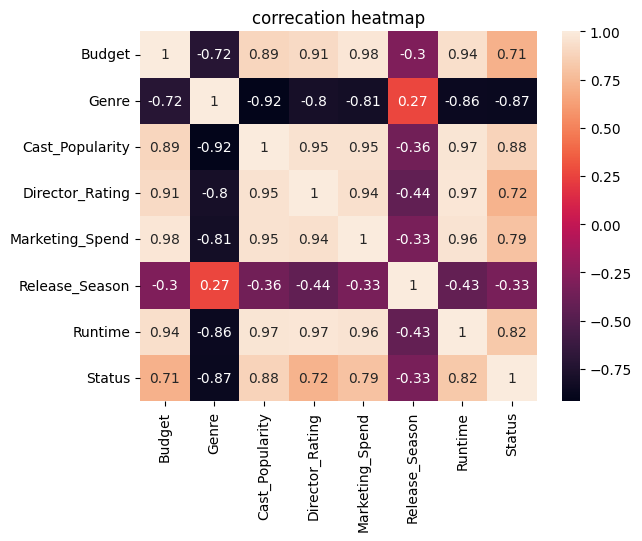


logistic regression Accuacy: 1.0

decision tree Accuacy: 1.0

random forest Accuacy: 1.0

SVA Accuacy: 0.5

Gradient Boosting Accuacy: 1.0


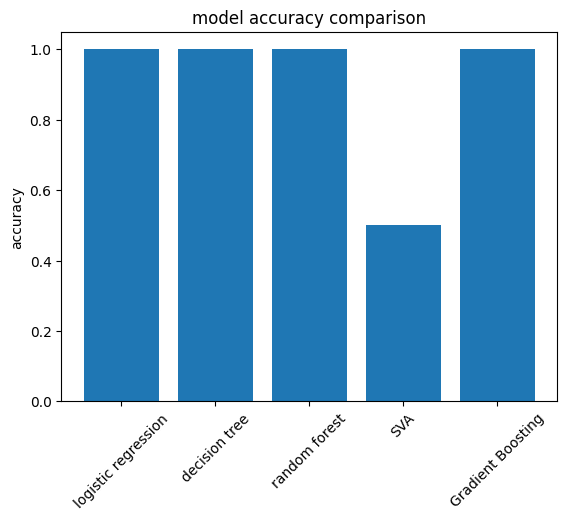

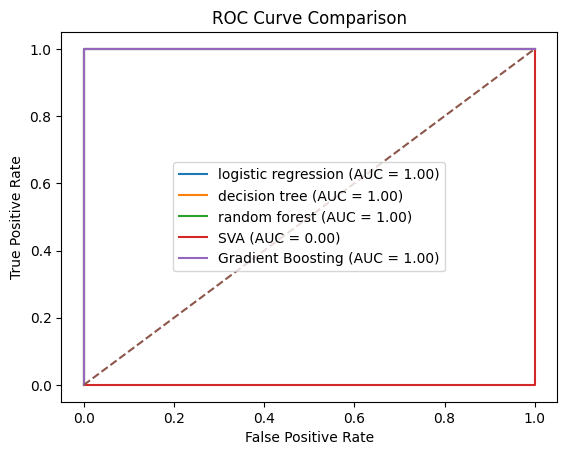


The best model is: logistic regression


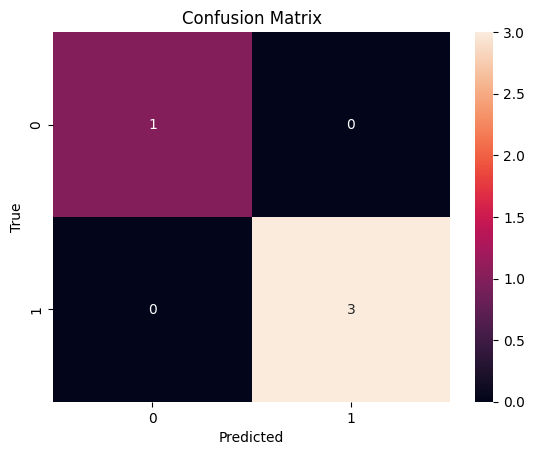

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

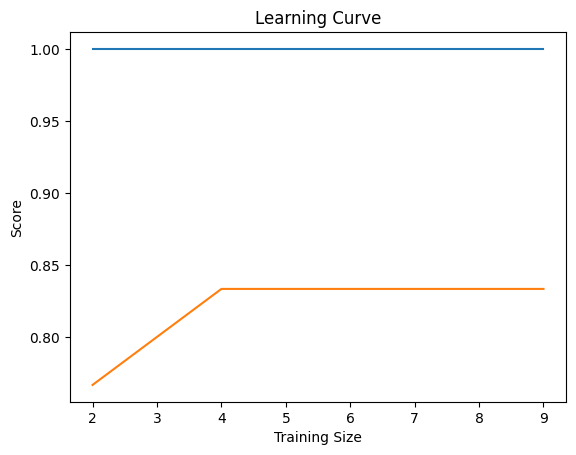

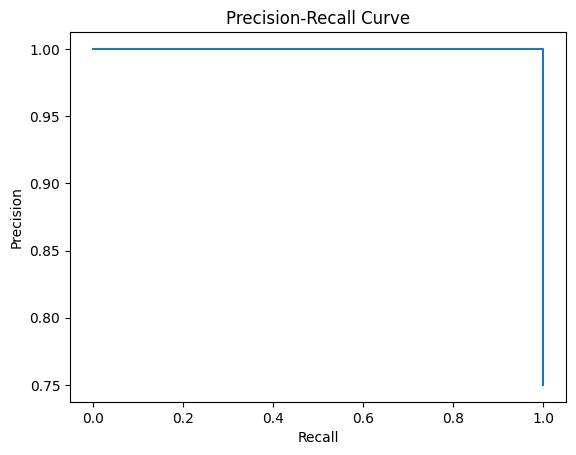


Model saved as best_movie_model.pkl 


In [3]:
#project of ml
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# movie success prediction
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#1 create dataset
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

df = pd.read_csv('movie_data.csv')

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#2 Encoding
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
le = LabelEncoder()
for col in ['Genre','Release_Season','Status']:
    df[col] = le.fit_transform(df[col])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#3 attractive Visual izations
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#count plot
plt.figure()
sns.countplot(x=df['Status'])
plt.title("Movie Status distribution (0=Flop, 1=hit)")
plt.show()

plt.figure()
sns.boxplot(x=df['Status'], y=df['Budget'])
plt.title("Budget vs Movie Status")
plt.show()

plt.figure()
sns.heatmap(df.corr(), annot=True) # Corrected: changed plt.heatmap to sns.heatmap
plt.title("correlation heatmap")
plt.show()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 4 TRAIN-TEST SPLIT
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x = df.drop('Status',axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 5 train multiple models
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

models = {
    "logistic regression": LogisticRegression(max_iter=1000), # Increased max_iter
    "decision tree": DecisionTreeClassifier(),
    "random forest": RandomForestClassifier(n_estimators=100),
    "SVA": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}
accuracies = {}
roc_data = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies[name] = accuracy

    y_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ =roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    print(f"\n{name} Accuacy:",accuracy)


#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 6 accuracy comparison graph
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure()
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=45)
plt.title("model accuracy comparison")
plt.ylabel("accuracy")
plt.show()

#project of ml
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# movie success prediction
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#1 create dataset
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

df = pd.read_csv('movie_data.csv')

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#2 Encoding
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
le = LabelEncoder()
for col in ['Genre','Release_Season','Status']:
    df[col] = le.fit_transform(df[col])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#3 attractive Visual izations
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

#count plot
plt.figure()
sns.countplot(x=df['Status'])
plt.title("Movie Status distribution (0=Flop, 1=hit)")
plt.show()

plt.figure()
sns.boxplot(x=df['Status'], y=df['Budget'])
plt.title("Budget vs Movie Status")
plt.show()

plt.figure()
sns.heatmap(df.corr(), annot=True) # Corrected: changed plt.heatmap to sns.heatmap
plt.title("correcation heatmap")
plt.show()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 4 TRAIN-TEST SPLIT
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x = df.drop('Status',axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 5 train multiple models
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

models = {
    "logistic regression": LogisticRegression(max_iter=1000), # Increased max_iter
    "decision tree": DecisionTreeClassifier(),
    "random forest": RandomForestClassifier(n_estimators=100),
    "SVA": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}
accuracies = {}
roc_data = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies[name] = accuracy

    y_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ =roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

    print(f"\n{name} Accuacy:",accuracy)


#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 6 accuracy comparison graph
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure()
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=45)
plt.title("model accuracy comparison")
plt.ylabel("accuracy")
plt.show()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 7 ROC curve
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

plt.figure()
for name, (fpr, tpr, roc_auc) in roc_data.items():
  plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(("ROC Curve Comparison"))
plt.legend()
plt.show()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# 8 select best model
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"\nThe best model is: {best_model_name}")

#---------------------------------------
#9 Confusion Matrix
#---------------------------------------

y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#------------------------------
#10 Feature Importance (if available)
#------------------------------

if hasattr(best_model, "feature_importances_"):
    plt.figure()
    plt.barh(x.columns, best_model.feature_importances_)
    plt.title("Feature Importance")
    plt.show()

#--------------------------------------
#11 Learning Curve
#--------------------------------------

train_sizes, train_scores, val_scores = learning_curve(best_model, x, y,cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.plot(train_sizes, np.mean(val_scores, axis=1))
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.show()

#---------------------------------
#12 precision-recall curve
#--------------------------------

y_prob = best_model.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

#------------------------------
#13 Save best model
#------------------------------

joblib.dump(best_model, 'best_model.pkl')
print("\nModel saved as best_movie_model.pkl ")